In [1]:
import os
import numpy as np
import pandas as pd

data_path = "/Users/jonghyun/GitRepo/Personal/nsmc/"

train_df = pd.read_csv(os.path.join(data_path, "ratings_train.txt"), delimiter='\t')
test_df  = pd.read_csv(os.path.join(data_path, "ratings_test.txt"), delimiter='\t')

train_df.head()

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


In [2]:
print(f"train dataset: {train_df.shape}\ntest dataset: {test_df.shape}")

train dataset: (150000, 3)
test dataset: (50000, 3)


In [3]:
import re

def preprocessor(df, col_name='document'):
    df[col_name] = df[col_name].map(lambda x: re.sub(r'[^\w\s]', '', str(x)))
    
    return df
    
train_df = preprocessor(train_df)
test_df  = preprocessor(test_df)

train_df.head()

,id,document,label
0,9976970,아 더빙 진짜 짜증나네요 목소리,0
1,3819312,흠포스터보고 초딩영화줄오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 솔직히 재미는 없다평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화스파이더맨에서 늙어보이기만 했던 커스틴 던...,1


In [4]:
from khaiii import KhaiiiApi
api = KhaiiiApi()

my_test_str = u'이 밤 그날의 반딧불을 당신의 창 가까이 보낼게요'

for word in api.analyze(my_test_str):
    print(word)

이	이/MM
밤	밤/NNG
그날의	그날/NNG + 의/JKG
반딧불을	반딧불/NNG + 을/JKO
당신의	당신/NP + 의/JKG
창	창/NNG
가까이	가까이/MAG
보낼게요	보내/VV + ㄹ게/EC + 이/VCP + 요/EC


In [5]:
def analyze_morphs(sentence):
    morphs = []
    try:
        for word in api.analyze(sentence):
            for morph in word.morphs:
                morphs.append((morph.lex, morph.tag))
        return morphs
    except:
        return []
    

analyze_morphs(my_test_str)

[('이', 'MM'),
 ('밤', 'NNG'),
 ('그날', 'NNG'),
 ('의', 'JKG'),
 ('반딧불', 'NNG'),
 ('을', 'JKO'),
 ('당신', 'NP'),
 ('의', 'JKG'),
 ('창', 'NNG'),
 ('가까이', 'MAG'),
 ('보내', 'VV'),
 ('ㄹ게', 'EC'),
 ('이', 'VCP'),
 ('요', 'EC')]

In [6]:
from tqdm import tqdm
tqdm.pandas()

train_df['morphs'] = train_df['document'].progress_apply(lambda x: analyze_morphs(x))
test_df['morphs'] = test_df['document'].progress_apply(lambda x: analyze_morphs(x))
train_df.head()

/Users/jonghyun/opt/anaconda3/envs/nlp/lib/python3.7/site-packages/tqdm/std.py:703: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel
100%|██████████| 50000/50000 [00:39<00:00, 1257.31it/s]


,id,document,label,morphs
0,9976970,아 더빙 진짜 짜증나네요 목소리,0,"[(아, IC), (더빙, MAG), (진, NNG), (짜, MAG), (짜증, ..."
1,3819312,흠포스터보고 초딩영화줄오버연기조차 가볍지 않구나,1,"[(흠포스터, NNP), (보, VV), (고, EC), (초딩, NNG), (영화..."
2,10265843,너무재밓었다그래서보는것을추천한다,0,"[(너무, MAG), (재, NNG), (밓, SH), (었, EP), (다, EC..."
3,9045019,교도소 이야기구먼 솔직히 재미는 없다평점 조정,0,"[(교도소, NNG), (이야기구, NNG), (먼, EC), (솔직히, MAG),..."
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화스파이더맨에서 늙어보이기만 했던 커스틴 던...,1,"[(사, NNG), (이몬페그, NNP), (의, JKG), (익살, NNG), (..."


In [7]:
# filtering logic을 추가해도 좋을 듯 

train_df['words'] = train_df['morphs'].progress_apply(lambda x: [word[0] for word in x])
test_df['words']  = test_df['morphs'].progress_apply(lambda x: [word[0] for word in x])

train_df.head()

100%|██████████| 50000/50000 [00:00<00:00, 143255.43it/s]


,id,document,label,morphs,words
0,9976970,아 더빙 진짜 짜증나네요 목소리,0,"[(아, IC), (더빙, MAG), (진, NNG), (짜, MAG), (짜증, ...","[아, 더빙, 진, 짜, 짜증, 나네, 요, 목소리]"
1,3819312,흠포스터보고 초딩영화줄오버연기조차 가볍지 않구나,1,"[(흠포스터, NNP), (보, VV), (고, EC), (초딩, NNG), (영화...","[흠포스터, 보, 고, 초딩, 영화줄오버연기, 조차, 가볍, 지, 않, 구나]"
2,10265843,너무재밓었다그래서보는것을추천한다,0,"[(너무, MAG), (재, NNG), (밓, SH), (었, EP), (다, EC...","[너무, 재, 밓, 었, 다, 그래, 서, 보, 는, 것, 을, 추천, 하, ㄴ다]"
3,9045019,교도소 이야기구먼 솔직히 재미는 없다평점 조정,0,"[(교도소, NNG), (이야기구, NNG), (먼, EC), (솔직히, MAG),...","[교도소, 이야기구, 먼, 솔직히, 재미, 는, 없, 다, 평점, 조정]"
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화스파이더맨에서 늙어보이기만 했던 커스틴 던...,1,"[(사, NNG), (이몬페그, NNP), (의, JKG), (익살, NNG), (...","[사, 이몬페그, 의, 익살, 스럽, ㄴ, 연기, 가, 돋보이, 었, 던, 영화스파..."


In [37]:
from tensorflow.python.keras.preprocessing.text import Tokenizer
from tensorflow.python.keras.preprocessing.sequence import pad_sequences

# train_review = [word for doc in train_df.words.values for word in doc]
# test_review  = [word for doc in test_df.words.values for word in doc]

train_review = train_df.words.values.tolist()
test_review  = test_df.words.values.tolist()

tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_review)

train_seq = tokenizer.texts_to_sequences(train_review)
test_seq  = tokenizer.texts_to_sequences(test_review)

In [38]:
word_vocab = tokenizer.word_index
max_length = 50

X_train = pad_sequences(train_seq, maxlen=max_length, padding='post')
X_test  = pad_sequences(test_seq, maxlen=max_length, padding='post')

y_train = train_df.label.values
y_test  = test_df.label.values

In [32]:
X_train.shape

(150000, 27)

In [40]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import losses
from tensorflow.keras import metrics

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(50, )))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
             loss=losses.binary_crossentropy,
             metrics=[metrics.binary_accuracy])

model.fit(X_train, y_train, epochs=5, batch_size=128)
results = model.evaluate(X_test, y_test)

Epoch 1/5
1172/1172 [==============================] - 1s 748us/step - loss: 66.4183 - binary_accuracy: 0.5052
Epoch 2/5
1172/1172 [==============================] - 1s 727us/step - loss: 1.1570 - binary_accuracy: 0.5014
Epoch 3/5
1172/1172 [==============================] - 1s 727us/step - loss: 0.6960 - binary_accuracy: 0.4995
Epoch 4/5
1172/1172 [==============================] - 1s 722us/step - loss: 0.6940 - binary_accuracy: 0.4974
Epoch 5/5
1563/1563 [==============================] - 1s 469us/step - loss: 0.6947 - binary_accuracy: 0.5035


In [46]:
from konlpy.tag import Okt

okt = Okt()

def okt_pos_tagging(sentence, okt=okt):
    return ['/'.join(t) for t in okt.pos(sentence, norm=True, stem=True)]

train_df['okt_pos'] = train_df['document'].progress_apply(okt_pos_tagging)
test_df['okt_pos']  = test_df['document'].progress_apply(okt_pos_tagging)

100%|██████████| 150000/150000 [18:23<00:00, 135.98it/s]


In [48]:
train_df.to_pickle("train_df.pkl")
test_df.to_pickle("test_df.pkl")

In [62]:
tokens = [t for d in train_df['okt_pos'].values.tolist() for t in d]
print(len(tokens))

import nltk
text = nltk.Text(tokens, name='NMSC')

1950498


In [64]:
# 중복을 제외한 토큰의 개수
print(len(set(text.tokens)))

48481


In [67]:
from pprint import pprint

# 출현 빈도가 높은 상위 토큰 10개
pprint(text.vocab().most_common(10))

ERROR: Could not find a version that satisfies the requirement pprint (from versions: none)
ERROR: No matching distribution found for pprint
[('영화/Noun', 50671),
 ('하다/Verb', 40957),
 ('이/Josa', 38605),
 ('보다/Verb', 38413),
 ('의/Josa', 30271),
 ('가/Josa', 26593),
 ('에/Josa', 26403),
 ('을/Josa', 23104),
 ('도/Josa', 19903),
 ('은/Josa', 18355)]


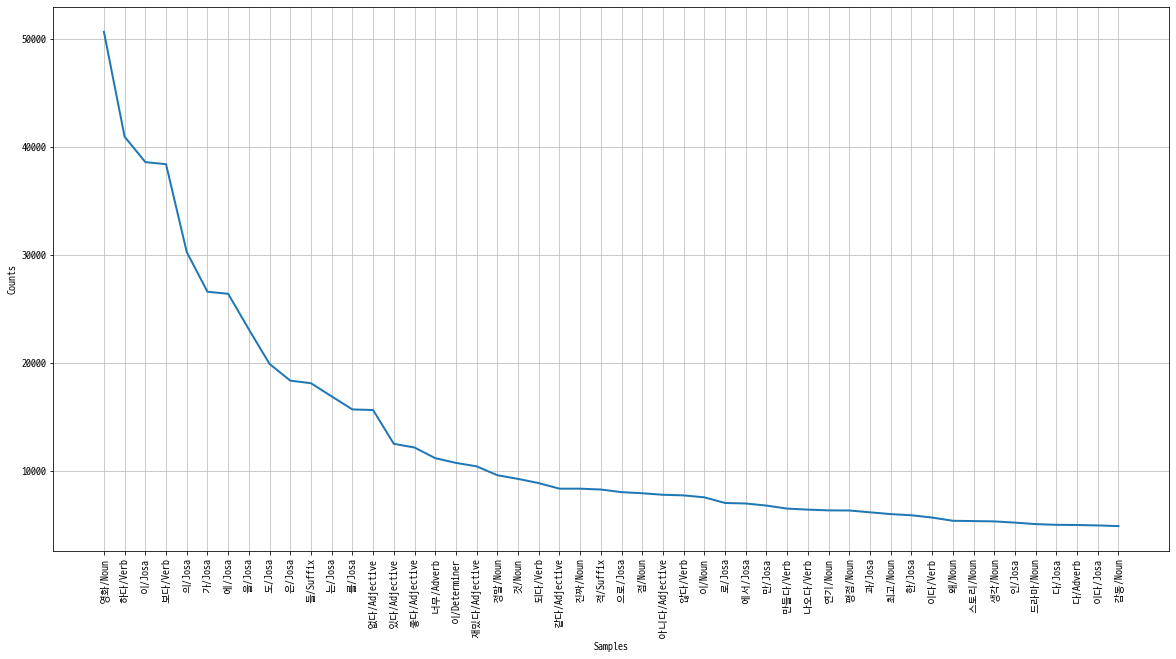

In [70]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
%matplotlib inline

font_fname = '/Users/jonghyun/Library/Fonts/D2Coding-Ver1.3.2-20180524.ttf'
font_name = font_manager.FontProperties(fname=font_fname).get_name()
rc('font', family=font_name)

plt.figure(figsize=(20,10))
text.plot(50)

In [72]:
selected_words = [f[0] for f in text.vocab().most_common(5000)]

def term_frequency(doc):
    return [doc.count(word) for word in selected_words]

X_train = [term_frequency(d) for d in train_df['okt_pos'].values.tolist()]
X_test = [term_frequency(d) for d in test_df['okt_pos'].values.tolist()]

y_train = train_df['label'].values.tolist()
y_test = test_df['label'].values.tolist()

In [74]:
X_train = np.asarray(X_train).astype('float32')
X_test = np.asarray(X_test).astype('float32')

y_train = np.asarray(y_train).astype('float32')
y_test = np.asarray(y_test).astype('float32')

In [77]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import losses
from tensorflow.keras import metrics

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(5000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
             loss=losses.binary_crossentropy,
             metrics=[metrics.binary_accuracy])

model.fit(X_train, y_train, epochs=10, batch_size=512)
results = model.evaluate(X_test, y_test)

Epoch 1/10
293/293 [==============================] - 2s 7ms/step - loss: 0.3991 - binary_accuracy: 0.8268
Epoch 2/10
293/293 [==============================] - 2s 6ms/step - loss: 0.3336 - binary_accuracy: 0.8535
Epoch 3/10
293/293 [==============================] - 2s 6ms/step - loss: 0.3136 - binary_accuracy: 0.8654
Epoch 4/10
293/293 [==============================] - 2s 8ms/step - loss: 0.2982 - binary_accuracy: 0.8744
Epoch 5/10
293/293 [==============================] - 2s 7ms/step - loss: 0.2829 - binary_accuracy: 0.8827
Epoch 6/10
293/293 [==============================] - 2s 7ms/step - loss: 0.2672 - binary_accuracy: 0.8905
Epoch 7/10
293/293 [==============================] - 2s 7ms/step - loss: 0.2500 - binary_accuracy: 0.8990
Epoch 8/10
293/293 [==============================] - 2s 7ms/step - loss: 0.2325 - binary_accuracy: 0.9069
Epoch 9/10
293/293 [==============================] - 2s 7ms/step - loss: 0.2168 - binary_accuracy: 0.9142
Epoch 10/10
1563/1563 [==============